<a href="https://colab.research.google.com/github/tathi-martins/pos_eng_e_analise_de_dados/blob/main/C%C3%B3pia_de_05_Aluno_Regressao_Arvores_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arvores de Decisão - Regressão

## Dicionário dos dados:

Aquisição de dados: Este é os dados de clima para Seattle, WA, em 2016,
usando o instrumento NOAA Climate Data Online.

- year: 2016
- month: número do mês do ano (por exemplo, 7 para julho)
- day: número do dia do ano (por exemplo, 30 para 30 de junho)
- week: dia da semana como uma string de caractere (por exemplo,
"segunda-feira")
- temp_1: temperatura de um dia anterior
- temp_2: temperatura de dois dias anteriores
- average: Média histórica da temperatura máxima
- Previsão do seu amigo (aleatório), valor menor 20 abaixo da média ou 20 acima da média
- actual: Medição de temperatura máxima real

Base de dados utilizada:
1. Carregamento de dados
2. O valor esperado de saída é **actual**
3. Remover as colunas 'year', 'month', 'day', 'week' pois não vamos considerar dados históricos relacionados a série temporal
4. Análise descritiva dos dados
5. Remoção de campos desnecessários
6. Tratamento de dados nulos e/ou faltantes
7. Separação dos dados, holdout
8. Normalização dos dados
9. Treinamento de modelos

In [ ]:
!pip install -U scikit-learn

# Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn import neighbors
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
%matplotlib inline

### Obtenha os dados
** Leia o arquivo csv 'temps.csv' em um DataFrame **

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('https://github.com/tathi-martins/Dataframes/blob/main/temp.xlsx?raw=true', engine='openpyxl')

** Verifique o cabeçalho do DataFrame.**

In [ ]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [ ]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


Remoção das colunas year,	month, day e week, pois não vamos trabalhar com a série temporal

In [ ]:
df.drop(columns=["year", "month", "day", "week"], inplace=True)

In [ ]:
df.head()

,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,45,45,45.6,45,43,50,44,29
1,44,45,45.7,44,41,50,44,61
2,45,44,45.8,41,43,46,47,56
3,44,41,45.9,40,44,48,46,53
4,41,40,46.0,44,46,46,46,41


## Estatística Descritiva

Dados faltantes

In [ ]:
df.isnull().sum()

,0
temp_2,0
temp_1,0
average,0
actual,0
forecast_noaa,0
forecast_acc,0
forecast_under,0
friend,0


<Axes: >

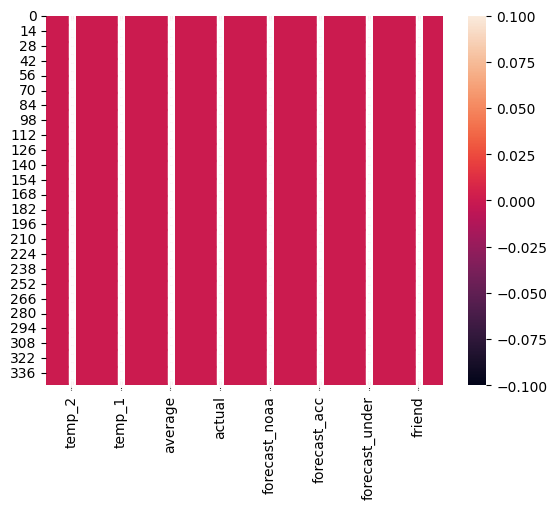

In [ ]:
#df.isnull()
#heatmap
sns.heatmap(df.isnull(), annot=True)

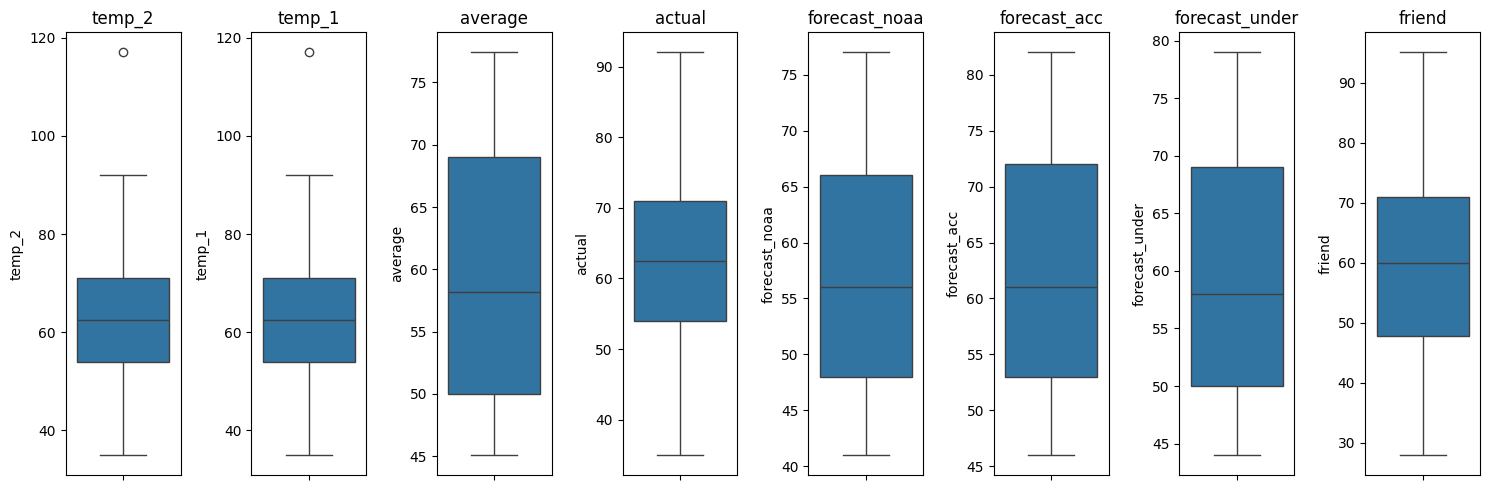

In [ ]:
plt.figure(figsize=(15, 5))

for i, column in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(1, len(df.select_dtypes(include=np.number).columns), i + 1)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


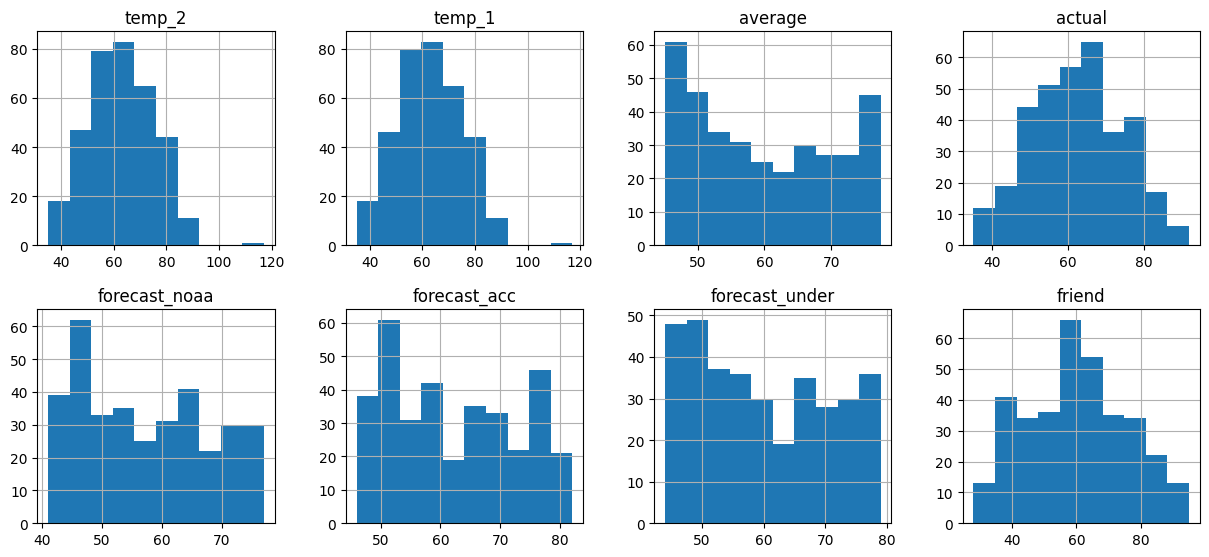

In [ ]:
df.hist(figsize=(15, 10), layout=(3, 4));

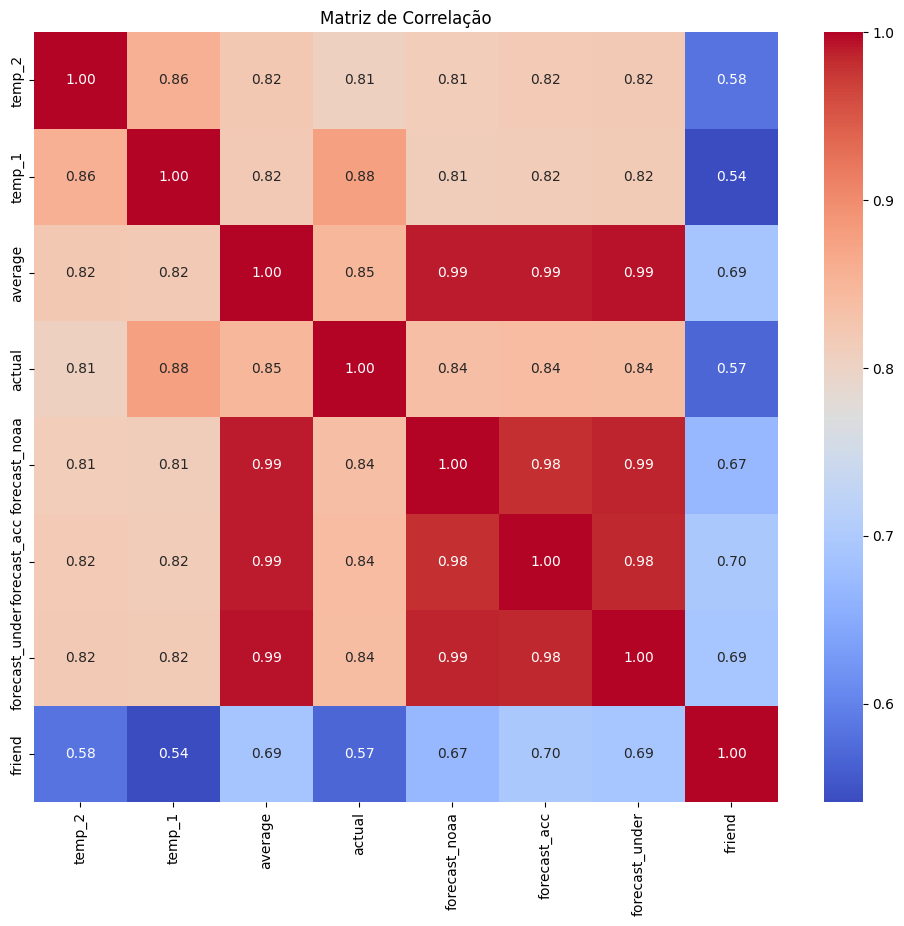

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


## Separação dos dados, holdout

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['actual']),
                                                    df['actual'],
                                                    test_size=0.3,
                                                    random_state=111)

In [ ]:
pd.DataFrame(X_train)

,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,friend
154,81,92,68.2,65,70,67,71
55,61,60,51.2,51,53,53,61
61,59,57,52.1,49,53,51,46
277,58,62,57.8,56,60,59,44
146,64,64,67.0,65,71,65,76
...,...,...,...,...,...,...,...
169,70,76,70.8,68,75,71,57
275,60,61,58.4,58,60,57,41
86,56,64,55.7,51,57,56,57
212,77,73,77.3,77,81,77,93


## Normalização dos dados

Hora de para padronizar as variáveis.

Import StandardScaler do Scikit-learn.

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

Converta as variáveis independentes com o StandardScaler

In [ ]:
X_test_scaled = scaler.transform(X_test)

Use o método .transform () para transformar os parâmetros em uma versão padronizada.

In [ ]:
X_train_scaled[:3]

array([[ 1.51648331,  2.36552985,  0.77074526,  0.69910044,  0.70846031,
         0.63982956,  0.68170615],
       [-0.19431263, -0.26561879, -0.85662436, -0.63930119, -0.92836829,
        -0.67301734,  0.02823635],
       [-0.36539222, -0.51228897, -0.7704695 , -0.83050142, -0.92836829,
        -0.8605669 , -0.95196835]])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 154 to 340
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp_2          243 non-null    int64  
 1   temp_1          243 non-null    int64  
 2   average         243 non-null    float64
 3   forecast_noaa   243 non-null    int64  
 4   forecast_acc    243 non-null    int64  
 5   forecast_under  243 non-null    int64  
 6   friend          243 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 15.2 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 49 to 329
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp_2          105 non-null    int64  
 1   temp_1          105 non-null    int64  
 2   average         105 non-null    float64
 3   forecast_noaa   105 non-null    int64  
 4   forecast_acc    105 non-null    int64  
 5   forecast_under  105 non-null    int64  
 6   friend          105 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 6.6 KB


## Árvores de Decisão

In [ ]:
reg_model = tree.DecisionTreeRegressor()

In [ ]:
reg_model.fit(X_train_scaled,y_train)
y_pred = reg_model.predict(X_test_scaled)

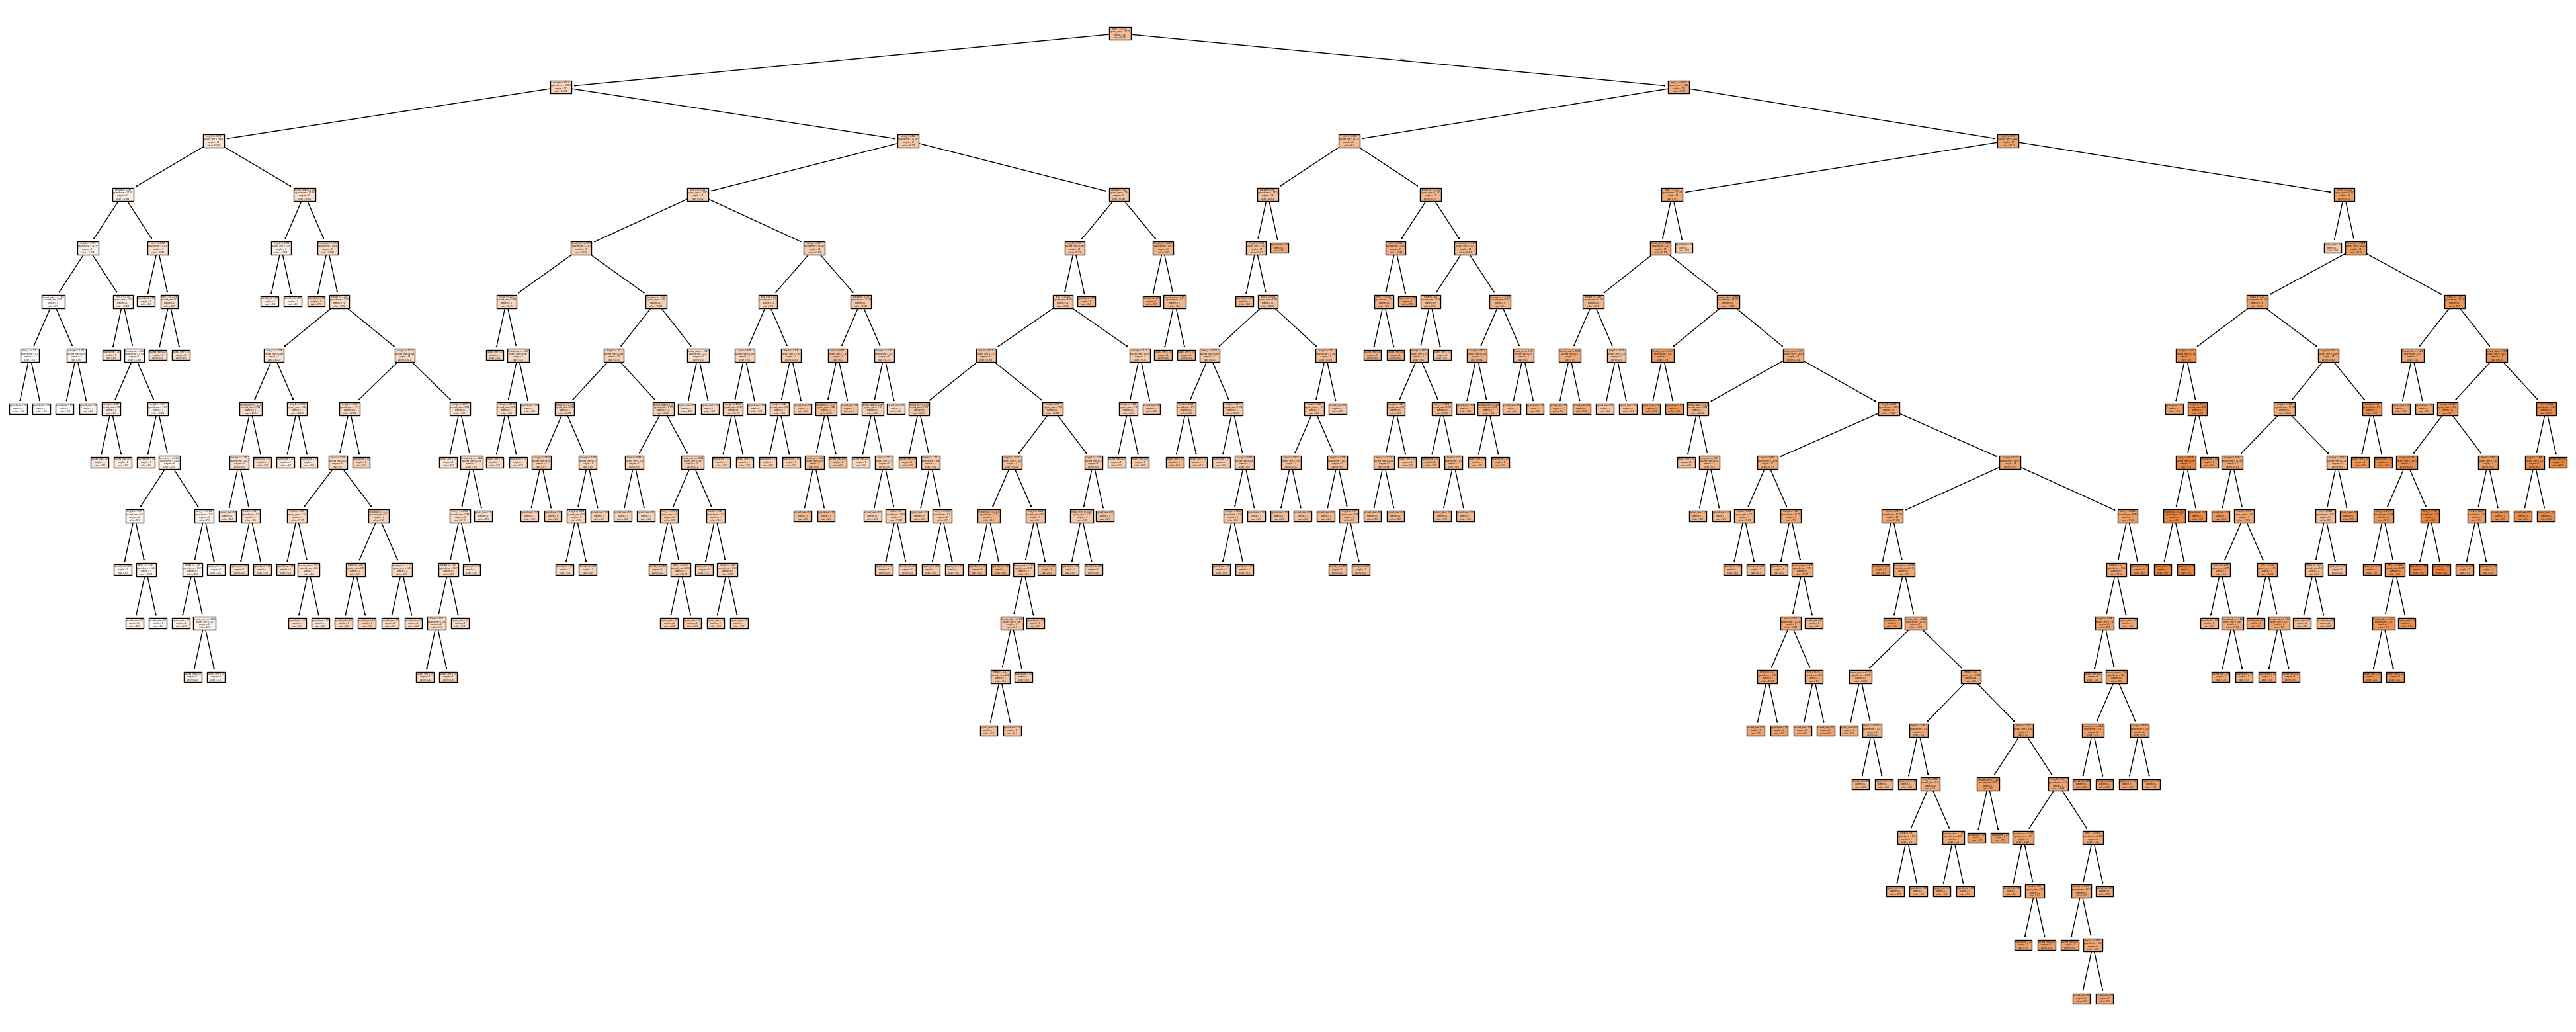

In [ ]:
class_labels = np.unique(y_train)

class_names = [str(label) for label in class_labels]

plt.figure(figsize=(50, 20))
tree.plot_tree(reg_model, feature_names=X_train.columns, class_names=class_names, filled=True)
plt.show()

### Executar o modelo treinado na base de treinamento

In [ ]:
#extrair as inferencias y_pred
#calcular o score

#treino
#model.score(X_test, y_test)

#teste
#model.score(X_test, y_test)

In [ ]:
reg_model.score(X_train_scaled, y_train)

1.0

In [ ]:
reg_model.score(X_test_scaled, y_test)

0.6743533396058699

### Avaliação de Regressores - Exibir os Resultados

In [ ]:
def print_metrics(y_test, y_test_pred):
  print("MEAN: ", mean_absolute_error(y_test, y_test_pred))
  print("MAPE: ", mean_absolute_percentage_error(y_test, y_test_pred))
  print("MSE: ", mean_squared_error(y_test, y_test_pred))
  print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
  print("R²: ", r2_score(y_test, y_test_pred))

In [ ]:
print_metrics(y_test, y_pred)

MEAN:  5.0
MAPE:  0.08029735225255213
MSE:  45.457142857142856
RMSE:  6.742191250412795
R²:  0.6743533396058699


## Validação cruzada com o algoritmo Árvores de Decisão

### Avaliar o melhor valor de max_depth

Text(0, 0.5, 'Score Rate')

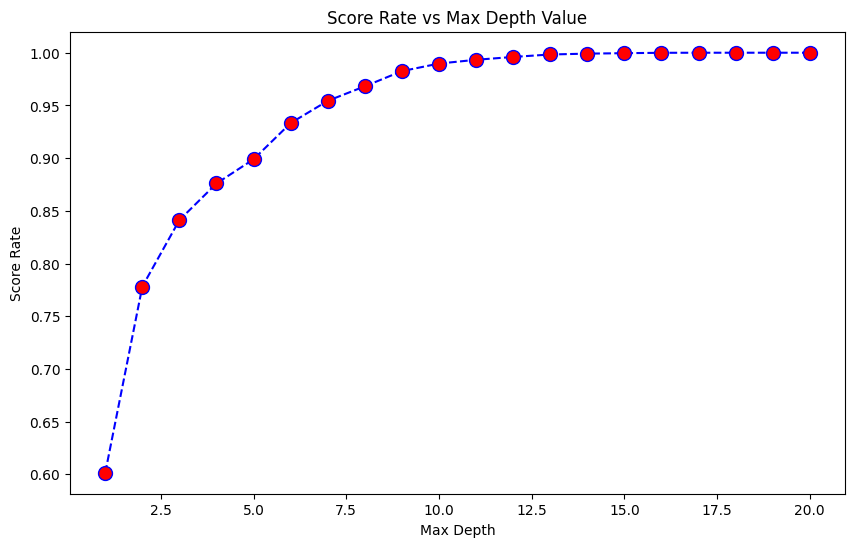

In [ ]:
score = []

for i in range(1,21):
  #MODELO
  reg_model = DecisionTreeRegressor(max_depth=i)
  #FIT
  reg_model.fit(X_train_scaled,y_train)
  #SCORE
  score.append(reg_model.score(X_train_scaled, y_train))


plt.figure(figsize=(10,6))
plt.plot(range(1,21), score, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Score Rate vs Max Depth Value')
plt.xlabel('Max Depth')
plt.ylabel('Score Rate')

### Criar um regressor com o melhor valor para max_depth e avalie





In [ ]:
reg_best_1 = DecisionTreeRegressor(max_depth=score.index(max(score))+1)

reg_best_1.fit(X_train_scaled, y_train)
print('Train: ', reg_best_1.score(X_train_scaled, y_train))
print('Test: ',reg_best_1.score(X_test_scaled, y_test))

Train:  1.0
Test:  0.6980962765044991


In [ ]:
print_metrics(y_test, reg_best_1.predict(X_test_scaled))

MEAN:  4.619047619047619
MAPE:  0.07447968871624246
MSE:  42.142857142857146
RMSE:  6.491753010001008
R²:  0.6980962765044991


A diferença das métricas entre os dados de treino (100% ou 1.0) e o de teste (68% ou 0.68) é muito grande. É possível que o modelo esteja com overfitting. Um desempenho muito semelhante ao do modelo com todos os parâmetros default.

Por isso decidimos usar o GridSearch para encontrar os melhores hiperparâmetros, com isso esperamos melhorar o desempenho do modelo tanto com os dados de treino como com os dados de teste.

### Aplicando o Gridsearch para encontrar os melhores parâmetros

In [ ]:

param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
}


grid_search = GridSearchCV(estimator=reg_model, param_grid=param_grid,
                           scoring='r2', cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train_scaled, y_train)

print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor score R²:", grid_search.best_score_)

y_pred = grid_search.best_estimator_.predict(X_test_scaled)
test_score = grid_search.score(X_test_scaled, y_test)
print(f'Score no conjunto de teste (R²): {test_score:.3f}')


Fitting 5 folds for each of 135 candidates, totalling 675 fits
Melhores parâmetros: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 20}
Melhor score R²: 0.8043630898790248
Score no conjunto de teste (R²): 0.817


**Vamos criar um modelo com todos os melhores parâmetros encontrados pelo GridSearch:**

In [ ]:
reg_best_2 = DecisionTreeRegressor(max_depth=10, max_features='log2', min_samples_leaf=10, min_samples_split=2)

reg_best_2.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=10, max_features='log2', min_samples_leaf=10)

In [ ]:
reg_best_cv_scores = cross_val_score(reg_best_2, X_train_scaled, y_train, cv=5, scoring='r2')

print("%0.2f accuracy with a standard deviation of %0.2f" % (reg_best_cv_scores.mean(), reg_best_cv_scores.std()))

0.76 accuracy with a standard deviation of 0.04


In [ ]:
print('Train: ', reg_best_2.score(X_train_scaled, y_train))
print('Test: ',reg_best_2.score(X_test_scaled, y_test))

Train:  0.8498227446327553
Test:  0.803582597546779


In [ ]:
print_metrics(y_test, reg_best_2.predict(X_test_scaled))

MEAN:  4.0728424035544775
MAPE:  0.06693162657097297
MSE:  27.417980924904125
RMSE:  5.236218189199541
R²:  0.803582597546779


A diferença entre os dados de teste e treino é muito pequena, um bom indício de que o modelo está aprendendo corretamente.

### Exiba a árvore de decisão do modelo treinado

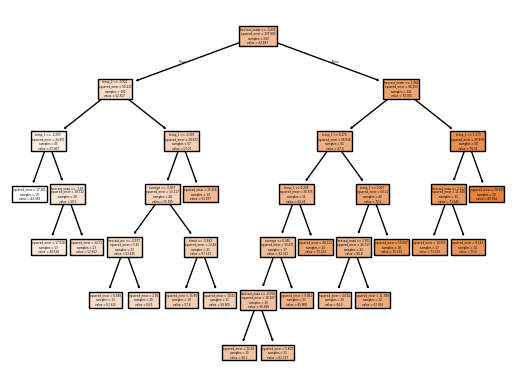

In [ ]:
_ = tree.plot_tree(reg_best_2,
                   feature_names=X_train.columns,
                   class_names=y_test.unique(),
                   filled=True)

### Plot dos valores previstos vs reais

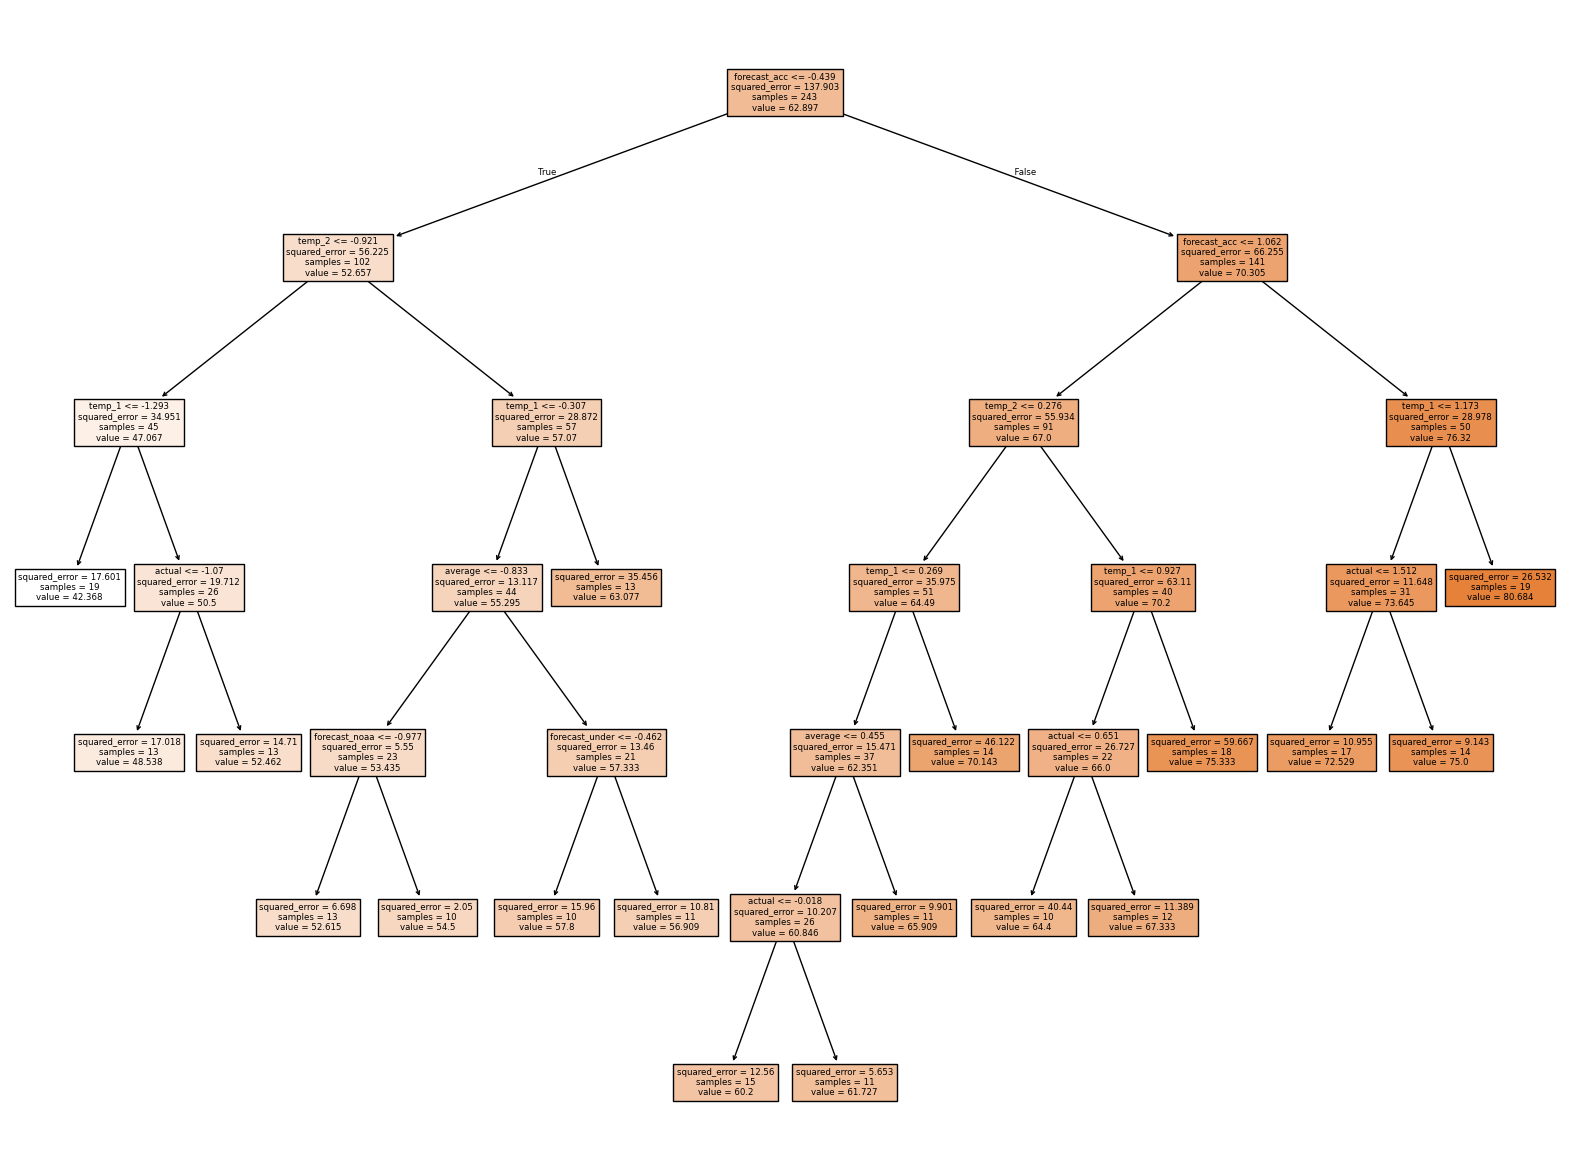

In [ ]:
fig = plt.figure(figsize=(20,15))
plt.title('Melhor regressor')
_ = tree.plot_tree(reg_best_2,
                   feature_names=df.columns,
                   class_names=y_test.unique(),
                   filled=True)

In [ ]:
y_pred = reg_best_2.predict(X_test_scaled)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers', name='Valores previstos vs reais', marker=dict(color='blue', size=8)))

fig.add_trace(go.Scatter(x=y_test, y=y_test, mode='lines', name='Valores reais', line=dict(color='red', dash='dash')))

fig.update_layout(
    title='Valores previstos vs reais (DecisionTreeRegressor)',
    xaxis_title='Valores reais',
    yaxis_title='Valores previstos',
    showlegend=True,
    width=800,
    height=600
)

fig.show()

Conclusão

A análise realizada com o dataset "temps" permitiu o desenvolvimento de um modelo de regressão utilizando árvores de decisão, com o objetivo de prever a temperatura real. Após a exploração inicial dos dados e a limpeza do conjunto, realizamos a divisão entre treino e teste, escalonamento dos dados e o ajuste de hiperparâmetros através do Grid Search. O modelo final, otimizado para uma profundidade máxima de 10 e com um conjunto específico de hiperparâmetros, apresentou um desempenho satisfatório, com um R² superior a 80,32% e um erro médio absoluto de 4.07. Além disso, a visualização dos resultados, tanto através da árvore de decisão quanto pelo gráfico de dispersão, evidenciou a eficácia do modelo em prever os valores reais.

Assim, concluímos que o uso de técnicas de machine learning, como a árvore de decisão, se mostrou promissor para tarefas de previsão de temperatura, oferecendo insights valiosos para futuras aplicações.